In [2]:
from pathlib import Path

In [3]:
from scilint.scilint import get_project_root

project_root = get_project_root()
datasets_path = Path(project_root, "datasets")

In [4]:
import pandas as pd
import seaborn as sns

# Load the CSV data into a pandas DataFrame
df = pd.read_csv(Path(datasets_path, "risk_data_preprocessed.csv"))

# Display the first few rows of the DataFrame
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_income_clipped,income_loan_ratio,income_emp_length_ratio,loan_credit_hist_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,59000.0,1.685714,479.674797,11666.666667
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,9600.0,9.600000,1920.000000,500.000000
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,9600.0,1.745455,9600.000000,1833.333333
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,65500.0,1.871429,16375.000000,17500.000000
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,54400.0,1.554286,6800.000000,8750.000000


* person_age: The age of the person.
* person_income: The income of the person.
* person_home_ownership: The home ownership status of the person. Possible values are RENT, OWN, and MORTGAGE.
* person_emp_length: The employment length of the person, in years.
* loan_intent: The intent of the loan.
* loan_grade: The grade of the loan.
* loan_amnt: The amount of the loan.
* loan_int_rate: The interest rate of the loan.
* loan_status: The status of the loan. 1 indicates the loan is not paid, and 0 indicates the loan is paid.
* loan_percent_income: The loan amount as a percentage of the person's income.
* cb_person_default_on_file: Indicates whether the person has a default on file. 'Y' indicates yes, and 'N' indicates no.
* cb_person_cred_hist_length: The length of the person's credit history, in years.

* person_age: The average age is around 28 years, with a minimum of 20 and a maximum of 144. The maximum age seems like a potential outlier or data entry error, as it's unlikely for someone to be 144 years old.
* person_income: The average income is about \\$66,074 with a wide range from \\$4,000 to \$6,000,000. The maximum income also seems like a potential outlier or data entry error.
* person_emp_length: The average employment length is about 4.8 years. However, there's a maximum value of 123 years, which seems unlikely and could be an error or outlier.
* loan_amnt: The average loan amount is about \\$9,589, with loans ranging from \\$500 to \\$35,000.
* loan_int_rate: The average loan interest rate is about 11.01%, with rates ranging from 5.42% to 23.22%.
* loan_status: About 21.82% of the loans are not paid.
* loan_percent_income: On average, the loan amount is 17.02% of the person's income.
* cb_person_cred_hist_length: The average length of credit history is about 5.8 years, with a minimum of 2 years and a maximum of 30 years.

* person_home_ownership: Majority of the individuals rent (16,446) or have a mortgage (13,444). A smaller number own their homes (2,584), and a very small group falls under the 'other' category (107).

* loan_intent: The loans are fairly evenly distributed among education (6,453), medical (6,071), venture (5,719), and personal (5,521) purposes. There are slightly fewer loans for debt consolidation (5,212) and home improvement (3,605).

* loan_grade: Most loans are graded 'A' (10,777) or 'B' (10,451), followed by 'C' (6,458), and 'D' (3,626). Very few loans are graded 'E' (964), 'F' (241), or 'G' (64).

*  cb_person_default_on_file: The majority of individuals do not have a default on file (26,836), while a smaller number do have a default on file (5,745).

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create correlation matrix
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

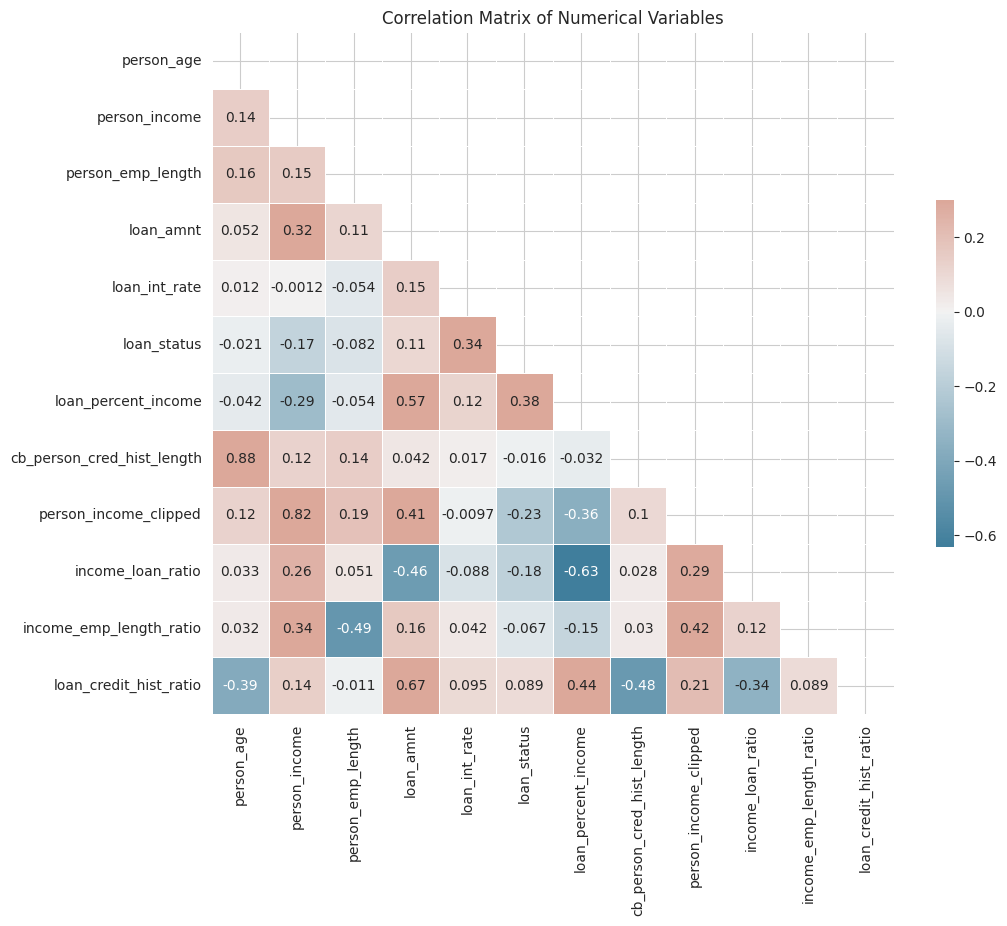

In [6]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    annot=True,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [7]:
# Distribution of categorical variables
categorical_cols = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file",
]

for col in categorical_cols:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())


Distribution of person_home_ownership:
person_home_ownership
RENT        16443
MORTGAGE    13442
OWN          2584
OTHER         107
Name: count, dtype: int64

Distribution of loan_intent:
loan_intent
EDUCATION            6451
MEDICAL              6071
VENTURE              5717
PERSONAL             5520
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Distribution of loan_grade:
loan_grade
A    10777
B    10448
C     6456
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Distribution of cb_person_default_on_file:
cb_person_default_on_file
N    26831
Y     5745
Name: count, dtype: int64


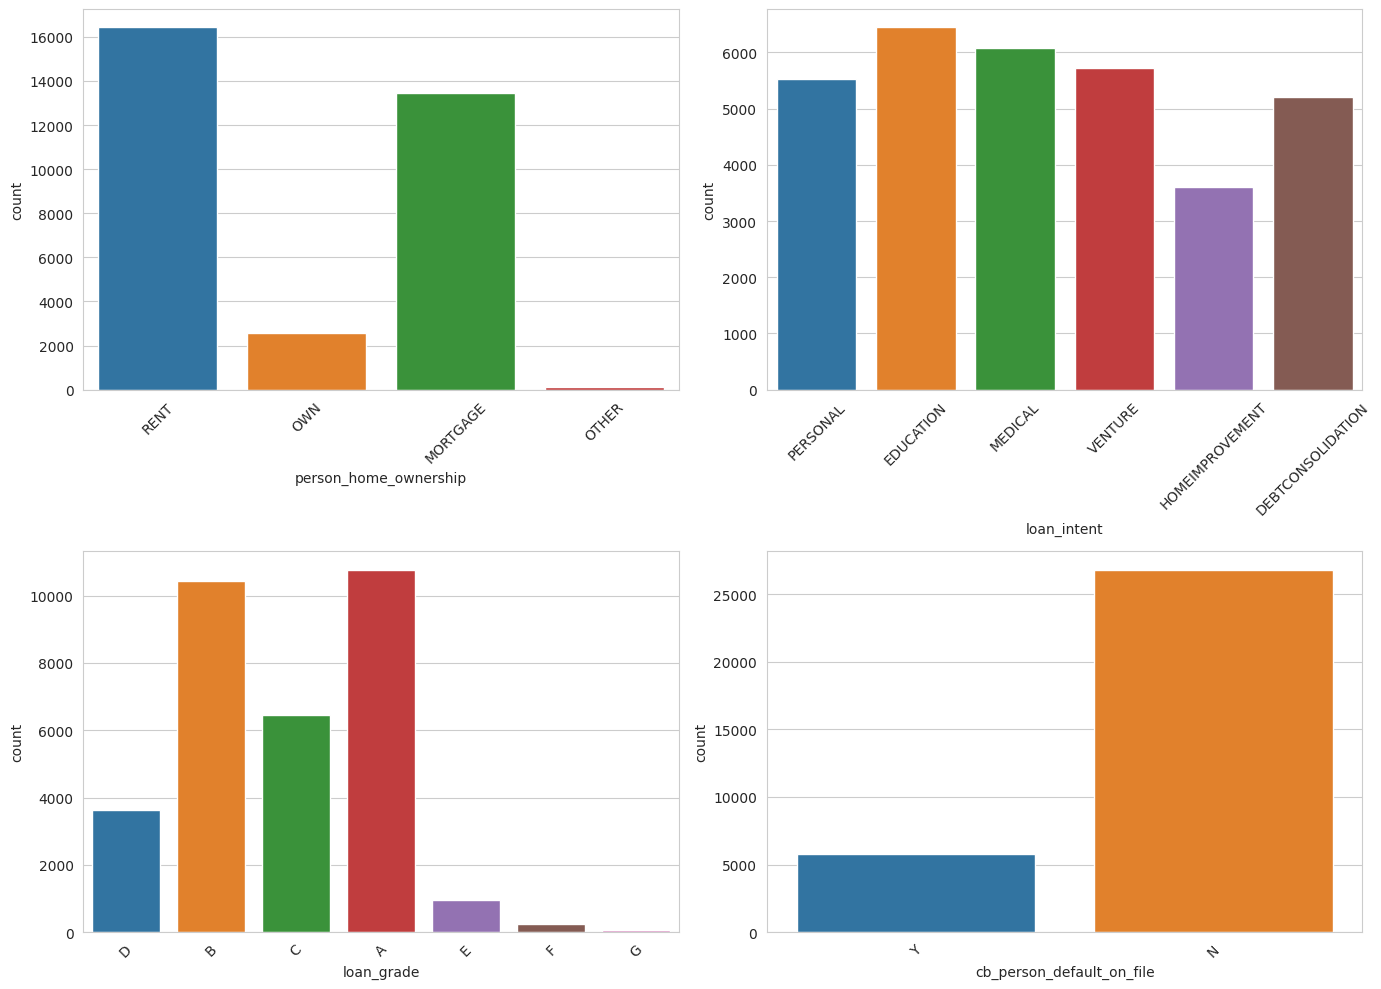

In [8]:
# Visualize the distribution of the categorical variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for col, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=df[col], ax=ax)
    ax.tick_params(axis="x", rotation=45)

fig.tight_layout()
plt.show()

In [9]:
# Check for missing values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
person_income_clipped            0
income_loan_ratio                0
income_emp_length_ratio          0
loan_credit_hist_ratio           0
dtype: int64

In [10]:
# Fill missing values
df["person_emp_length"].fillna(0, inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)
df["income_emp_length_ratio"] = df["income_emp_length_ratio"].replace(
    np.nan, df["income_emp_length_ratio"].median()
)
df["income_emp_length_ratio"] = df["income_emp_length_ratio"].replace(
    np.inf, df["income_emp_length_ratio"].median()
)

# Check if all missing values have been filled
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
person_income_clipped         0
income_loan_ratio             0
income_emp_length_ratio       0
loan_credit_hist_ratio        0
dtype: int64

In [11]:
# Perform one-hot encoding on the categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Display the first few rows of the new DataFrame
df_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_income_clipped,income_loan_ratio,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,59000.0,1.685714,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,9600.0,9.600000,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,9600.0,1.745455,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,65500.0,1.871429,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,54400.0,1.554286,...,False,False,False,True,False,False,False,False,False,True


df_encoded["income_emp_length_ratio"] = df_encoded["income_emp_length_ratio"].clip(upper=df_encoded["income_emp_length_ratio"].quantile(0.999))

In [12]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and the target variable y
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((26060, 30), (6516, 30))

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize a Random Forest Classifier
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and the classification report
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 93.22%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5096
           1       0.97      0.71      0.82      1420

    accuracy                           0.93      6516
   macro avg       0.95      0.85      0.89      6516
weighted avg       0.93      0.93      0.93      6516



In [14]:
# Perform 5-fold cross-validation and calculate the mean accuracy
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_cv_mean = rf_cv_scores.mean()

# Print the cross-validation scores and the mean score
print(f"Cross-validation scores for Random Forest: {rf_cv_scores}")
print(f"Mean cross-validation score for Random Forest: {rf_cv_mean:.3f}")

NameError: name 'cross_val_score' is not defined

In [ ]:
# import matplotlib.pyplot as plt
# # Import necessary libraries
# from sklearn.metrics import auc, roc_auc_score, roc_curve

# # Calculate the probabilities of the predictions
# y_pred_proba = rf.predict_proba(X_test)[:, 1]

# # Calculate the Gini coefficient
# gini = 2 * roc_auc_score(y_test, y_pred_proba) - 1

# # Print the Gini coefficient
# print(f"Gini: {gini:.2f}")

In [25]:
# Necessary imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split


def preprocess(df):
    """
    Preprocess the data.

    Parameters:
    df (DataFrame): The original DataFrame.

    Returns:
    X_train (DataFrame): Training data.
    X_test (DataFrame): Test data.
    y_train (Series): Training labels.
    y_test (Series): Test labels.
    """
    # Fill missing values
    df["person_emp_length"].fillna(0, inplace=True)
    df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

    # Convert categorical variables into a format suitable for ML algorithms using one-hot encoding
    categorical_cols = [
        "person_home_ownership",
        "loan_intent",
        "loan_grade",
        "cb_person_default_on_file",
    ]
    df_encoded = pd.get_dummies(df, columns=categorical_cols)

    # Define the feature matrix X and the target variable y
    X = df_encoded.drop("loan_status", axis=1)
    y = df_encoded["loan_status"]

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test


def fit(X_train, y_train):
    """
    Fit a Random Forest model.

    Parameters:
    X_train (DataFrame): Training data.
    y_train (Series): Training labels.

    Returns:
    model (RandomForestClassifier): The trained model.
    """
    model = RandomForestClassifier(class_weight="balanced", random_state=42)
    model.fit(X_train, y_train)

    return model


def evaluate(model, X_test, y_test, features):
    """
    Evaluate the model.

    Parameters:
    model (RandomForestClassifier): The trained model.
    X_test (DataFrame): Test data.
    y_test (Series): Test labels.

    Returns:
    None
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy*100:.2f}%")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    gini = 2 * roc_auc_score(y_test, y_pred_proba) - 1
    print(f"\nGini: {gini:.2f}")

    print(f"Plotting ROC Curve...")

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(
        fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

In [26]:
# Create a sample of 100 rows from the dataset
worked_example = df.sample(100, random_state=42)
worked_example.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_income_clipped,income_loan_ratio,income_emp_length_ratio,loan_credit_hist_ratio
14447,25,107000,MORTGAGE,1.0,MEDICAL,A,1000,7.40,0,0.01,N,4,107000.0,107.000000,107000.000000,250.000000
29635,40,34560,MORTGAGE,3.0,MEDICAL,B,10000,10.99,0,0.29,N,12,34560.0,3.456000,11520.000000,833.333333
11096,22,42000,RENT,6.0,MEDICAL,E,10000,16.32,1,0.24,Y,4,42000.0,4.200000,7000.000000,2500.000000
10424,21,28600,RENT,3.0,PERSONAL,C,10000,11.34,1,0.35,Y,3,28600.0,2.860000,9533.333333,3333.333333
12628,22,28000,RENT,4.0,EDUCATION,B,3000,10.59,0,0.11,N,3,28000.0,9.333333,7000.000000,1000.000000


In [27]:
X_train, X_test, y_train, y_test = preprocess(worked_example)

In [28]:
# TODO try wrapping in a test_preprocess
# Check that missing values have been filled in
assert X_train.isnull().sum().sum() == 0
assert X_test.isnull().sum().sum() == 0

# Check that categorical variables have been encoded
assert "person_home_ownership" not in X_train.columns
assert "loan_intent" not in X_train.columns
assert "loan_grade" not in X_train.columns
assert "cb_person_default_on_file" not in X_train.columns

assert "person_home_ownership" not in X_test.columns
assert "loan_intent" not in X_test.columns
assert "loan_grade" not in X_test.columns
assert "cb_person_default_on_file" not in X_test.columns

# Check that the data has been split into a training set and a test set
assert len(X_train) > 0
assert len(X_test) > 0
assert len(y_train) > 0
assert len(y_test) > 0

# Check the sizes of the training and test sets
n = len(worked_example)
assert len(X_train) == round(0.8 * n)
assert len(X_test) == round(0.2 * n)
assert len(y_train) == round(0.8 * n)
assert len(y_test) == round(0.2 * n)

# Check the dtypes of the output DataFrames
assert X_train.dtypes.all() in [
    np.dtype("float64"),
    np.dtype("int64"),
    np.dtype("uint8"),
    np.dtype("bool"),
]
assert X_test.dtypes.all() in [
    np.dtype("float64"),
    np.dtype("int64"),
    np.dtype("uint8"),
    np.dtype("bool"),
]
assert y_train.dtype == np.dtype("int64")
assert y_test.dtype == np.dtype("int64")

# Check that the target variable is binary
assert y_train.isin([0, 1]).all()
assert y_test.isin([0, 1]).all()

In [29]:
# Call the fit function on the training data
model = fit(X_train, y_train)

# Check that the model is an instance of RandomForestClassifier
assert isinstance(model, RandomForestClassifier)
# Check that the model has been fitted
assert hasattr(model, "feature_importances_")

Accuracy: 90.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20


Gini: 0.73
Plotting ROC Curve...


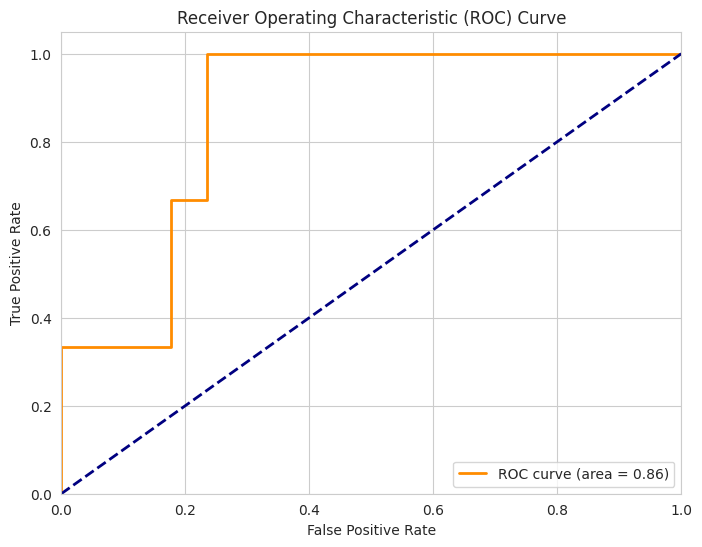

In [30]:
evaluate(model, X_test, y_test, features=X_test.columns)

# Check that the model can make predictions on the test data
y_pred = model.predict(X_test)
assert len(y_pred) == len(y_test)

# Check that the model can predict probabilities on the test data
y_pred_proba = model.predict_proba(X_test)
assert len(y_pred_proba) == len(y_test)

# Check that the predicted probabilities are between 0 and 1
assert (y_pred_proba >= 0).all() and (y_pred_proba <= 1).all()